In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/sample_submission.csv
/kaggle/input/dataset/data_description.txt
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width',170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df= pd.read_csv('/kaggle/input/dataset/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns.nunique()

81

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
def get_first_info(X):
    print("verimizin boyutu:",X.shape)
    print("------------------------------------------")
    print(X.info())
    print("------------------------------------------")
    print(X.describe().T)

In [7]:
get_first_info(df)

verimizin boyutu: (1460, 81)
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-

In [8]:
def grab_col_names(dataframe,cat_upper_limit=10 ,cardinal_lower_limit = 20): 
    """ 
    This function helps to determine types of columns. Numerical,Categorical,Cardinal 
    Parameters: dataframe = DataFrame 
    cat_upper_limit = upper limit of categorical columns's number of unique ->values 10 inital value
    cardinal_lowe_limit = lower limit to classify a column as cardinal -> 20 initial value
    Return: 
    cat_cols: includes categorical names but also includes encoding columns or has less unique value than cat_lower_limit
    num_cols: includes  names of numerical columns 
    cardinal_cols : includes names of cardinal columns.In other words,columns which does not carry information. 
    """  
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_upper_limit and 
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > cardinal_lower_limit and 
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
 
    return cat_cols,num_cols,cat_but_car

In [9]:
cat_cols,num_cols,cardinal_cols = grab_col_names(df)

In [10]:
print(cat_cols,num_cols,cardinal_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold'] ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorch

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df,num_cols,cat_cols): 
    for col in cat_cols:  
        sns.countplot(x=df[col],data=df) 
        plt.title(col) 
        plt.show() 
        print("---------------------------------------------------------------------------") 

    for col in num_cols: 
        df[col].hist() 
        plt.title(col) 
        print("-------------------------------------------------------------------------------") 
        plt.show()


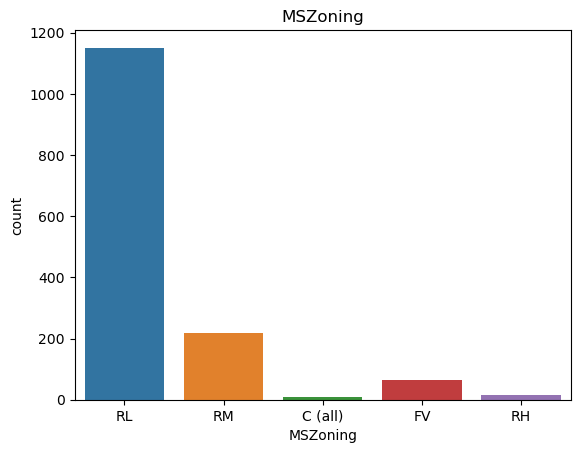

---------------------------------------------------------------------------


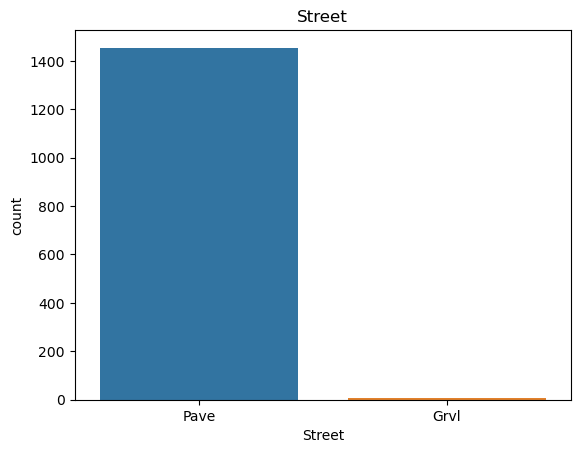

---------------------------------------------------------------------------


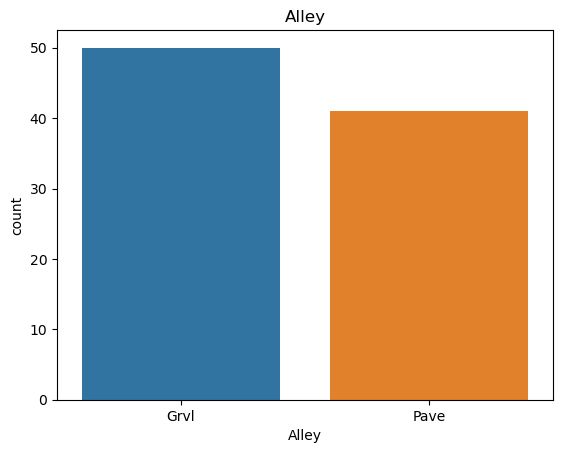

---------------------------------------------------------------------------


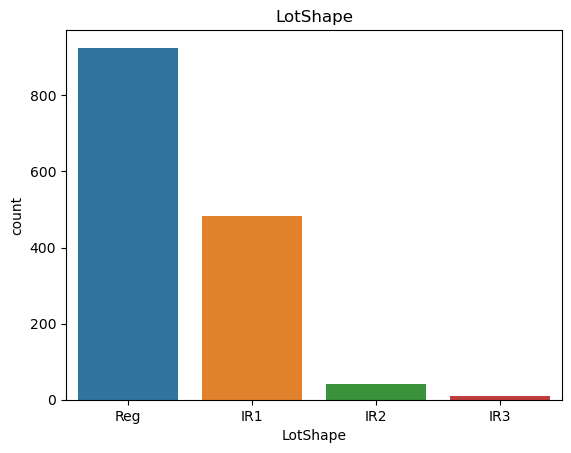

---------------------------------------------------------------------------


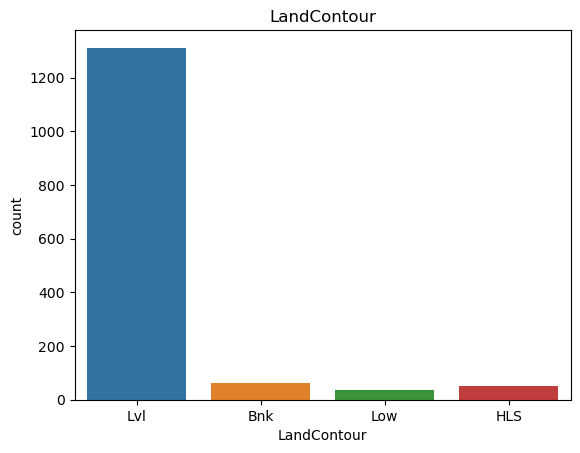

---------------------------------------------------------------------------


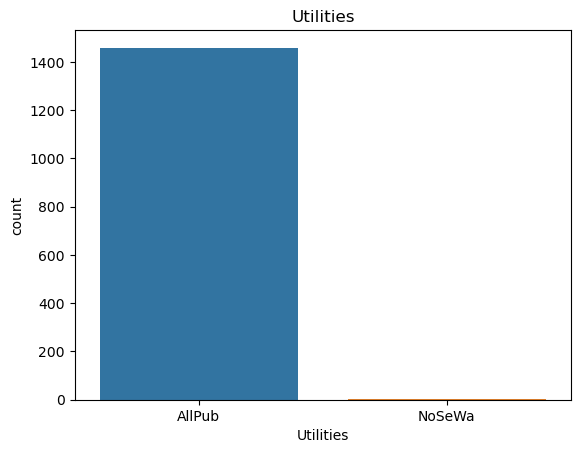

---------------------------------------------------------------------------


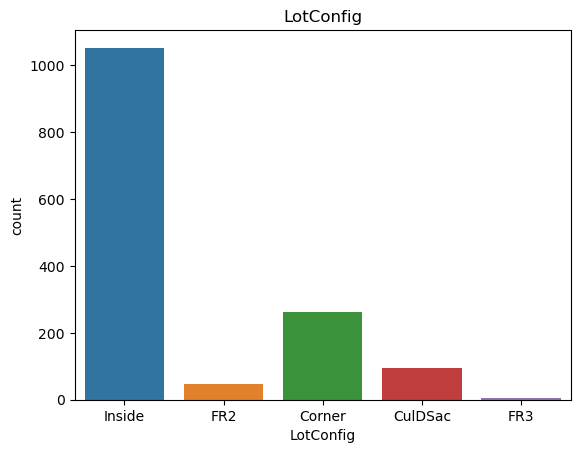

---------------------------------------------------------------------------


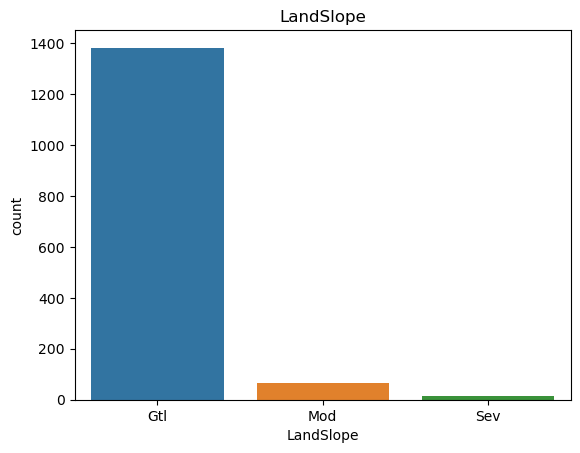

---------------------------------------------------------------------------


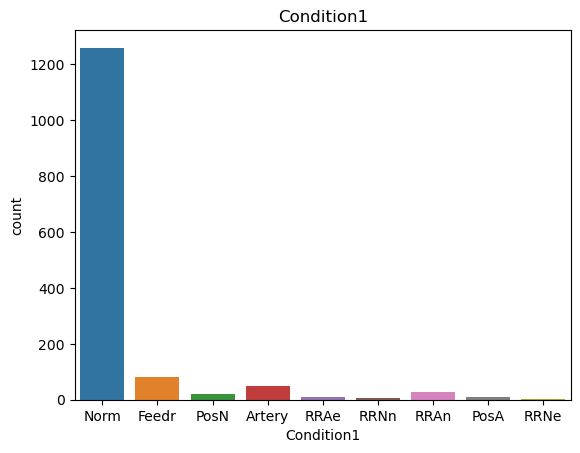

---------------------------------------------------------------------------


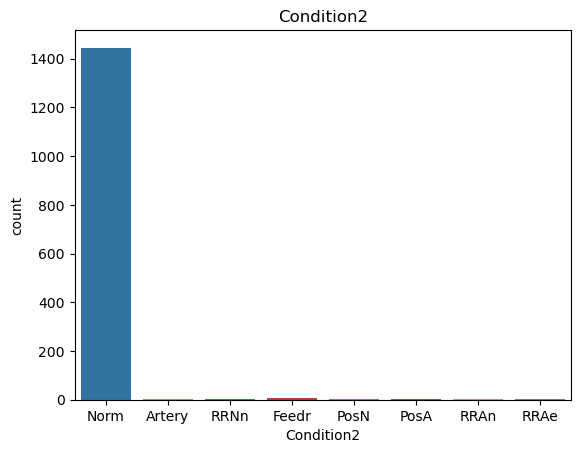

---------------------------------------------------------------------------


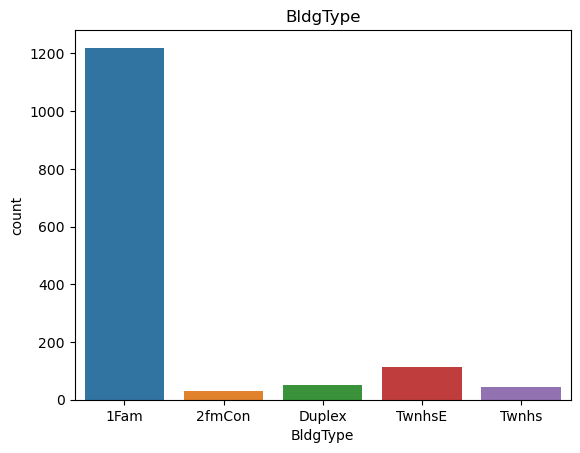

---------------------------------------------------------------------------


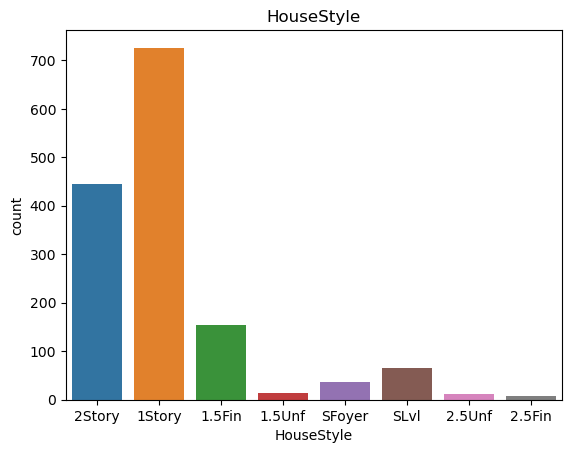

---------------------------------------------------------------------------


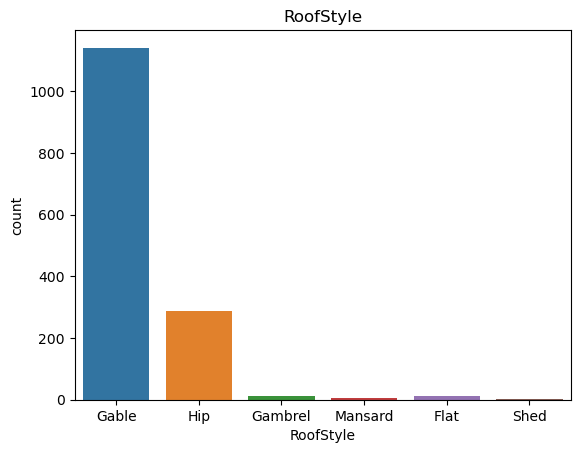

---------------------------------------------------------------------------


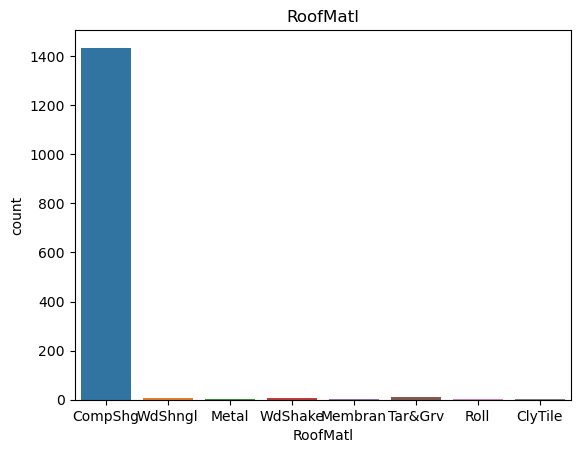

---------------------------------------------------------------------------


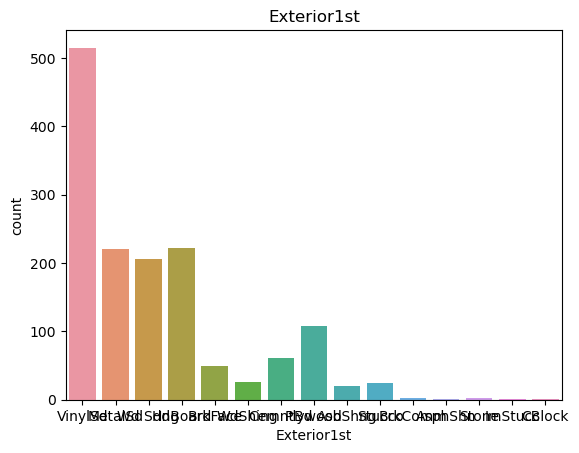

---------------------------------------------------------------------------


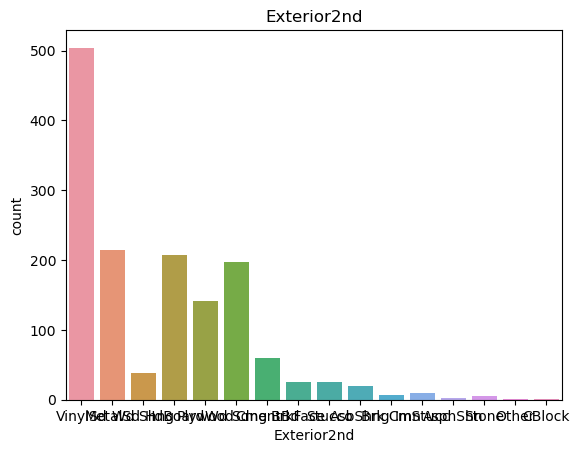

---------------------------------------------------------------------------


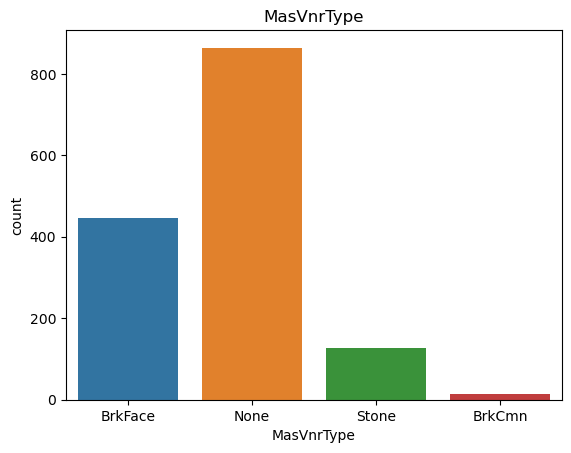

---------------------------------------------------------------------------


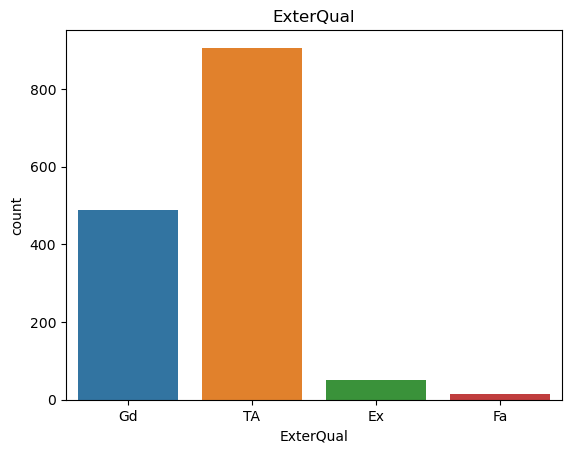

---------------------------------------------------------------------------


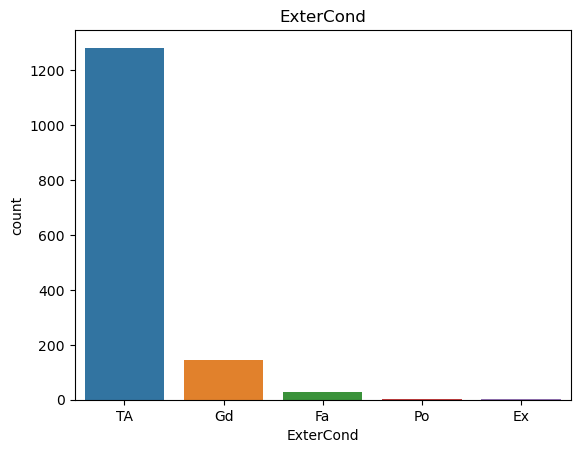

---------------------------------------------------------------------------


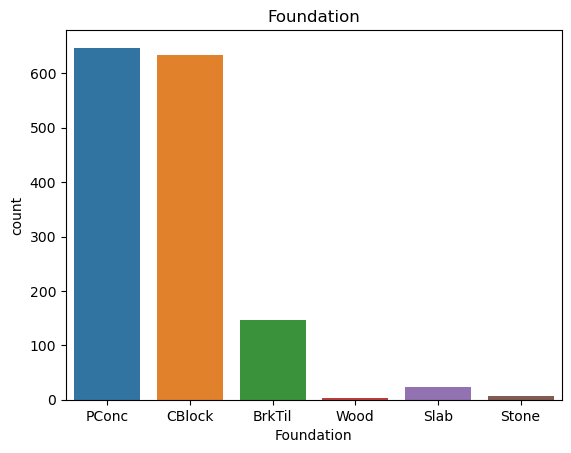

---------------------------------------------------------------------------


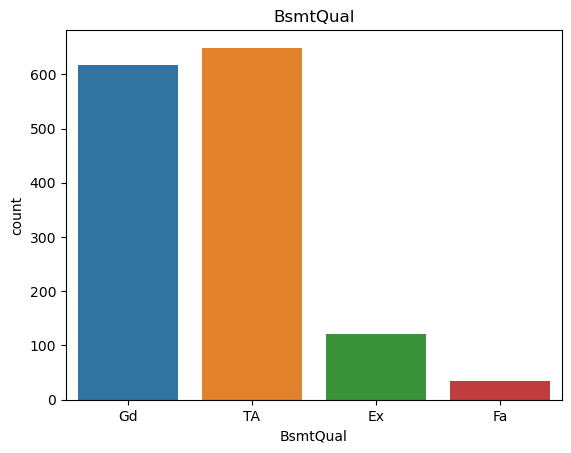

---------------------------------------------------------------------------


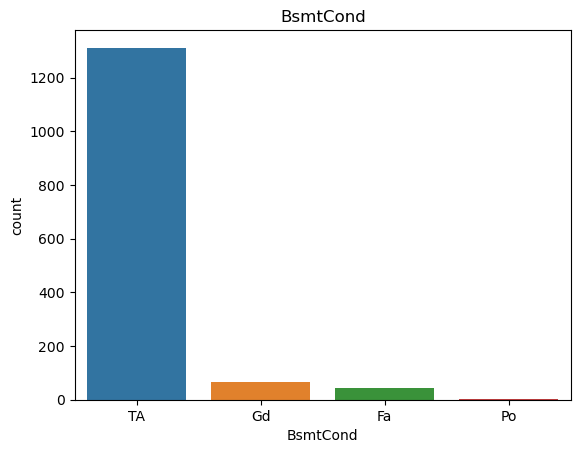

---------------------------------------------------------------------------


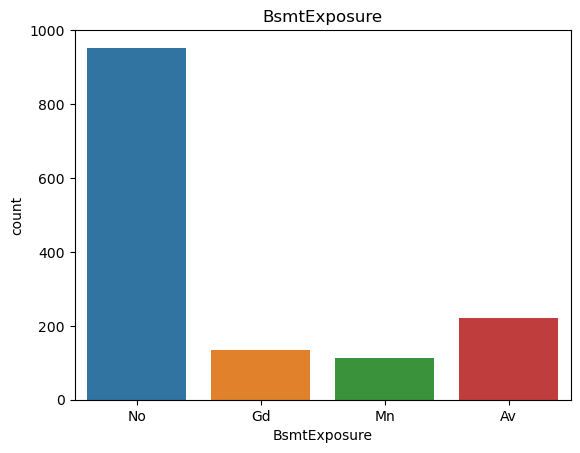

---------------------------------------------------------------------------


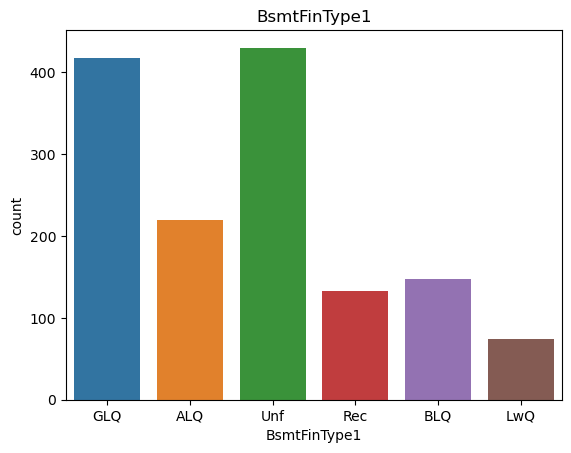

---------------------------------------------------------------------------


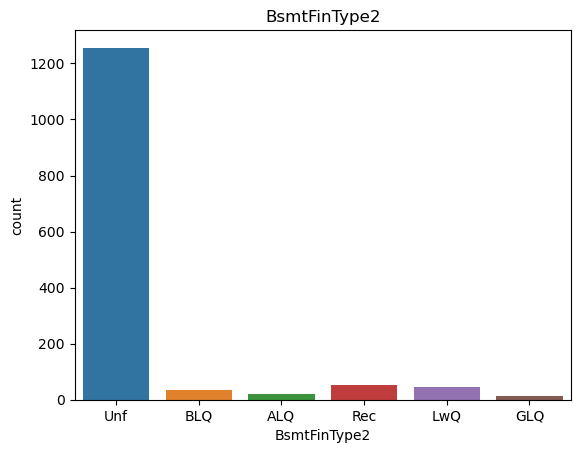

---------------------------------------------------------------------------


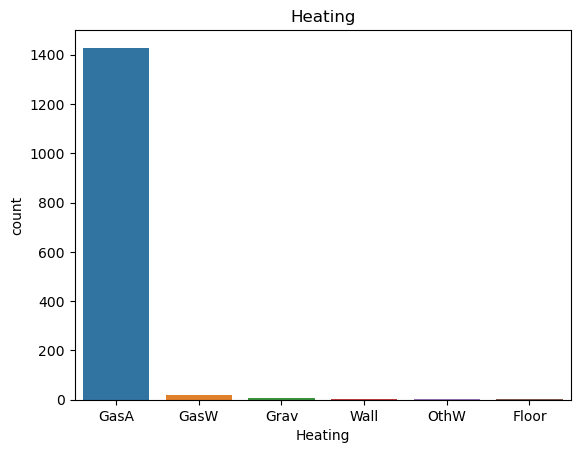

---------------------------------------------------------------------------


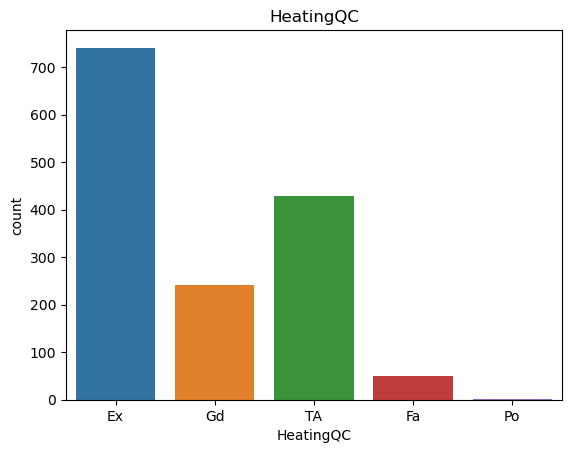

---------------------------------------------------------------------------


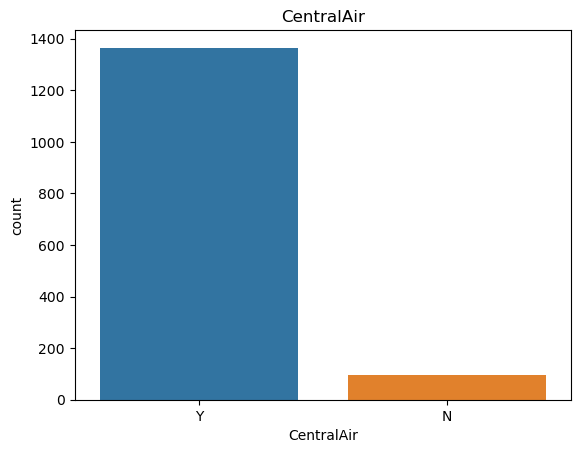

---------------------------------------------------------------------------


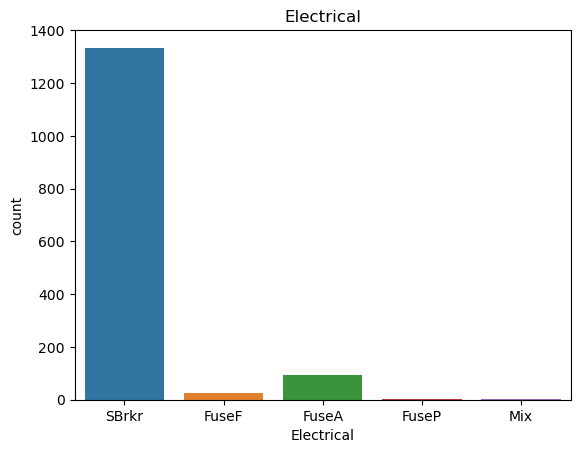

---------------------------------------------------------------------------


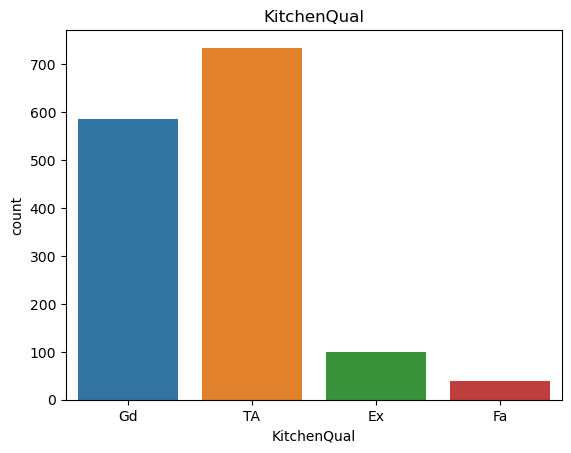

---------------------------------------------------------------------------


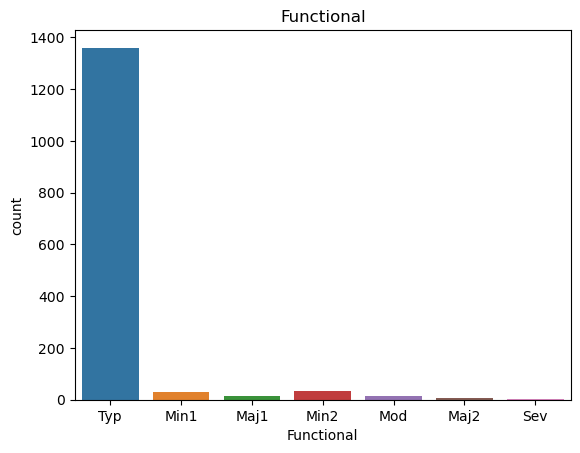

---------------------------------------------------------------------------


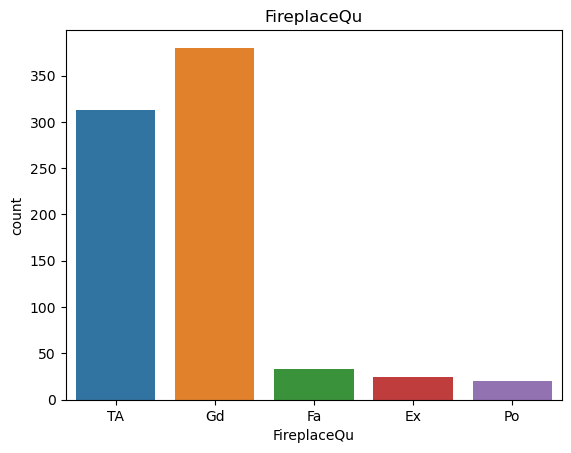

---------------------------------------------------------------------------


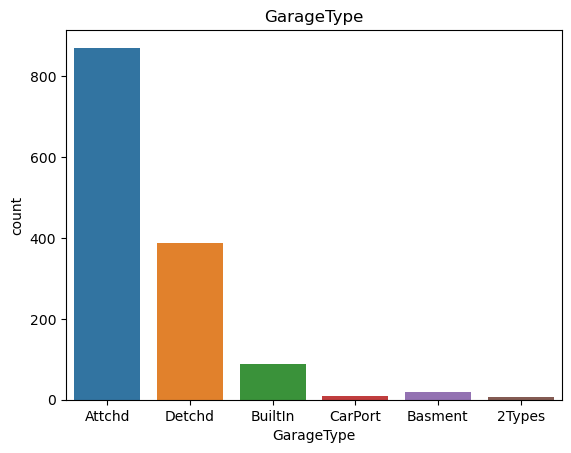

---------------------------------------------------------------------------


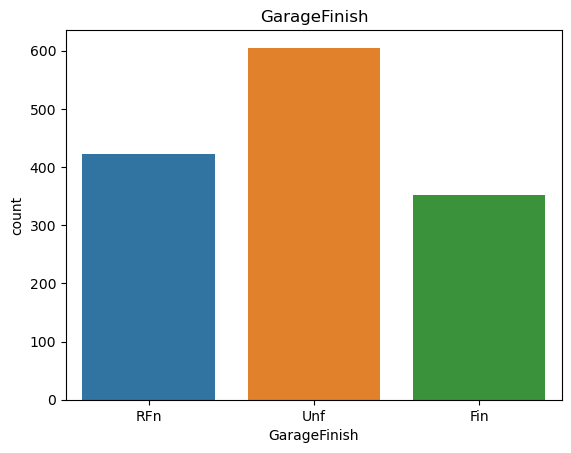

---------------------------------------------------------------------------


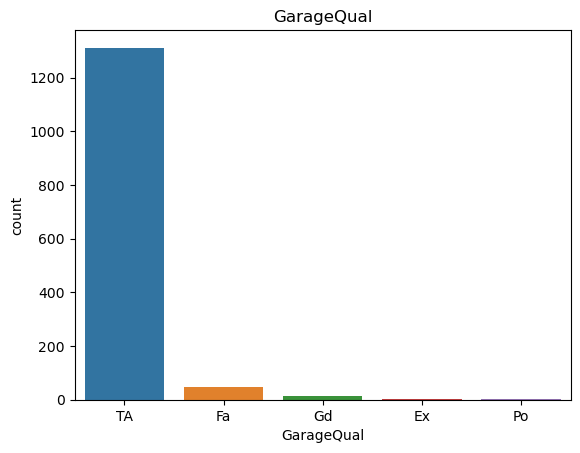

---------------------------------------------------------------------------


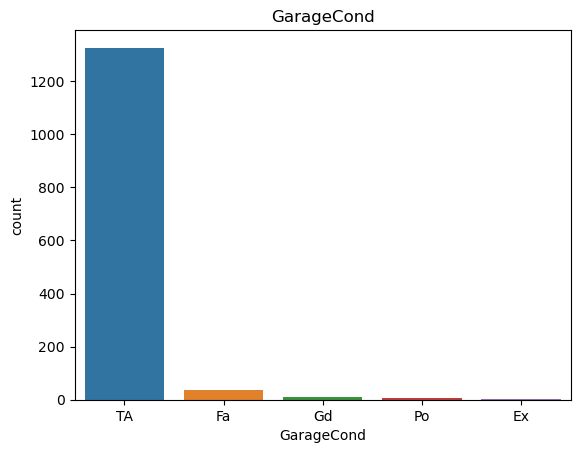

---------------------------------------------------------------------------


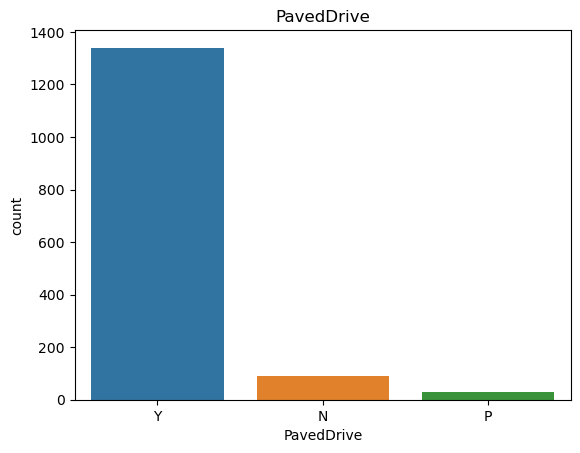

---------------------------------------------------------------------------


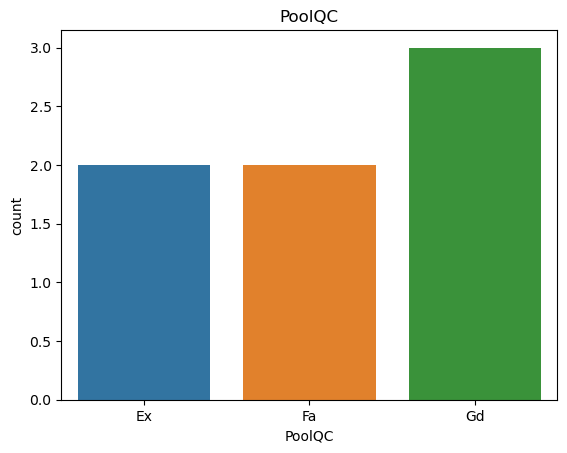

---------------------------------------------------------------------------


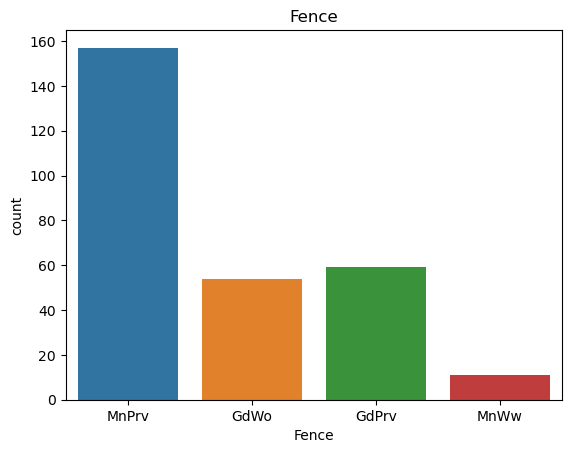

---------------------------------------------------------------------------


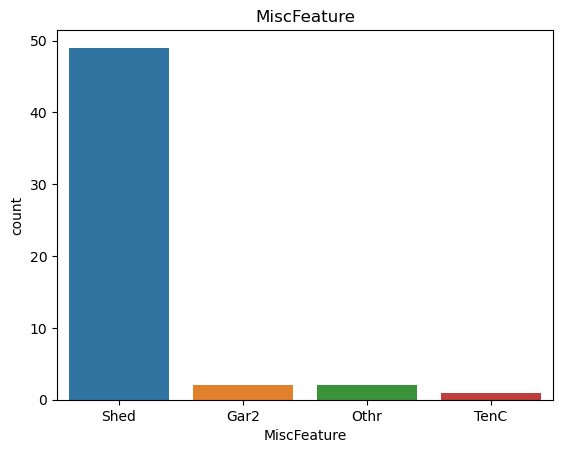

---------------------------------------------------------------------------


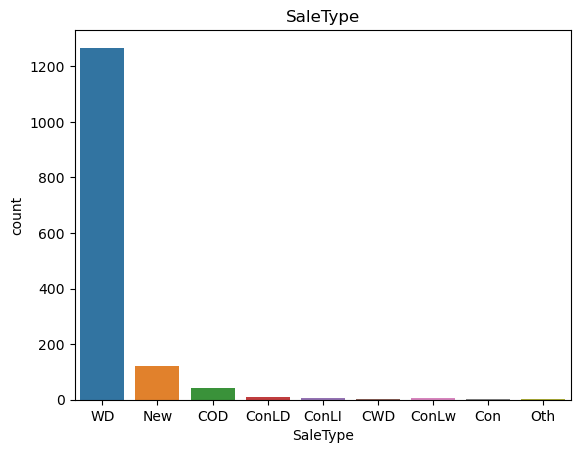

---------------------------------------------------------------------------


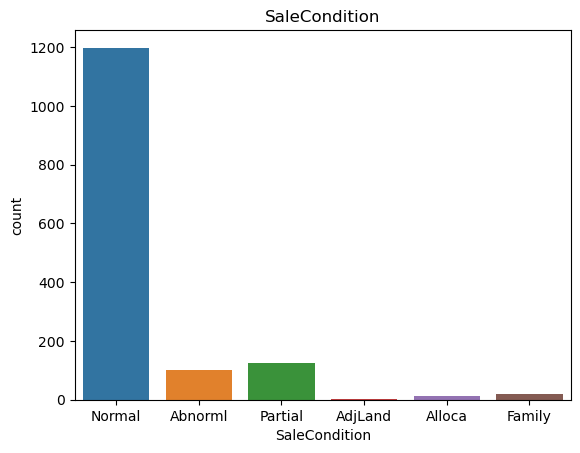

---------------------------------------------------------------------------


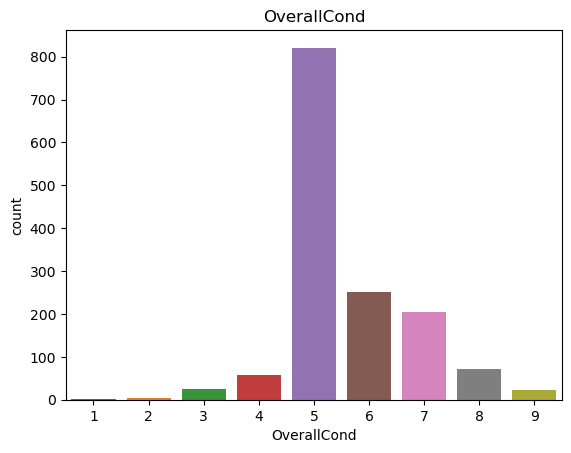

---------------------------------------------------------------------------


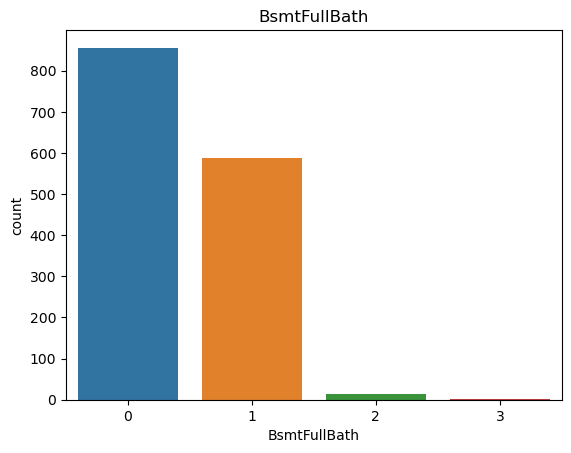

---------------------------------------------------------------------------


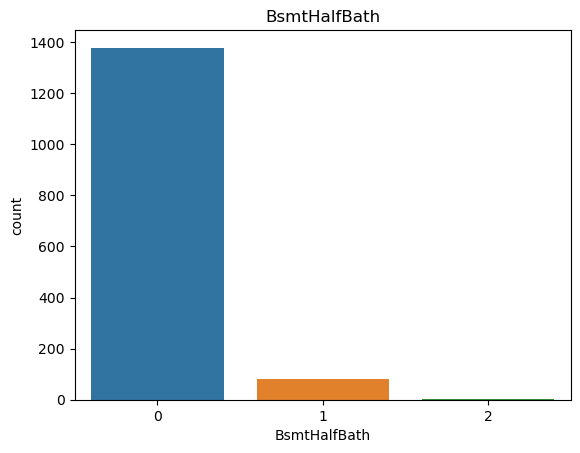

---------------------------------------------------------------------------


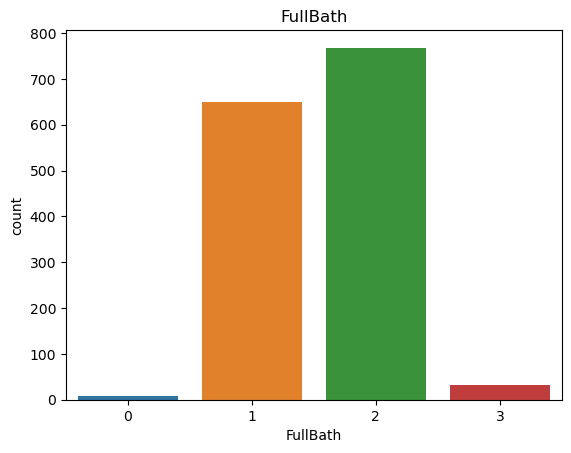

---------------------------------------------------------------------------


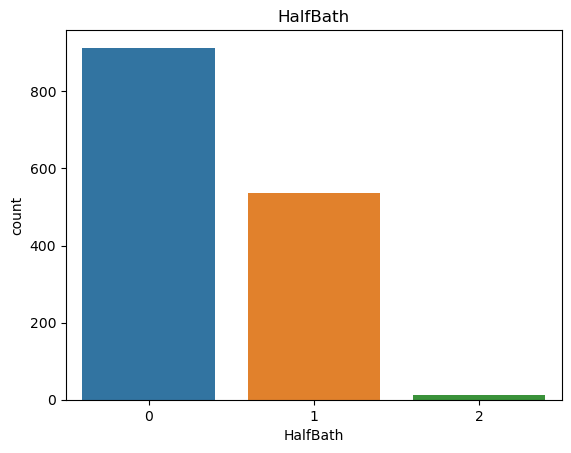

---------------------------------------------------------------------------


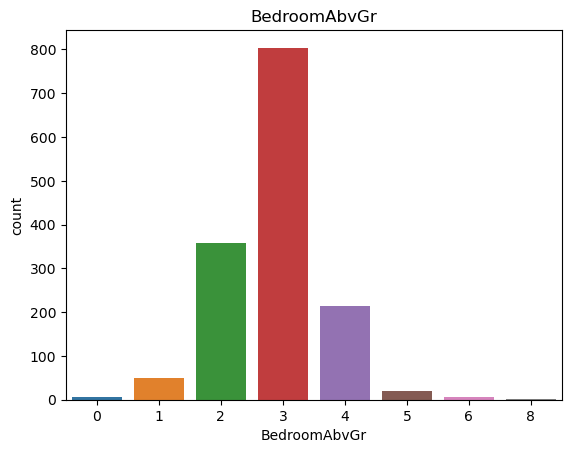

---------------------------------------------------------------------------


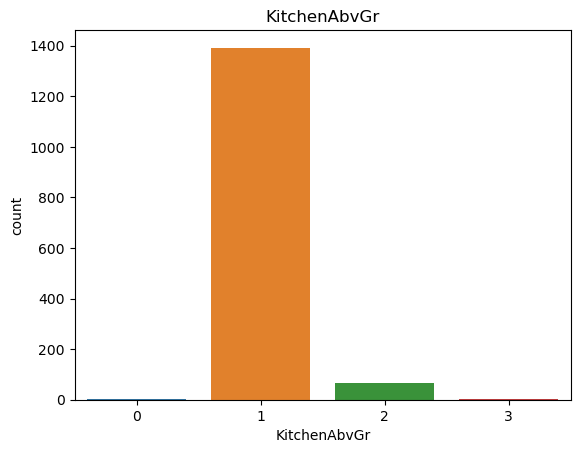

---------------------------------------------------------------------------


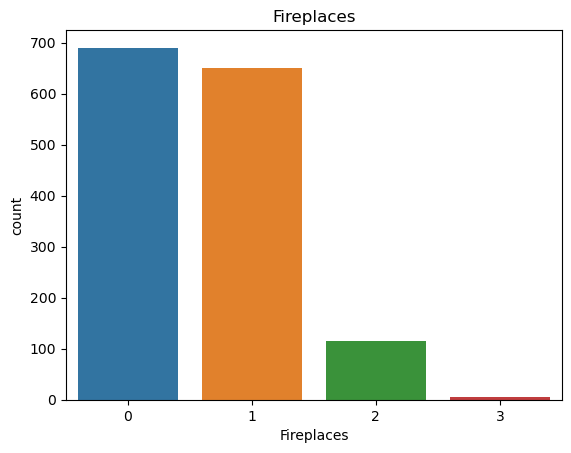

---------------------------------------------------------------------------


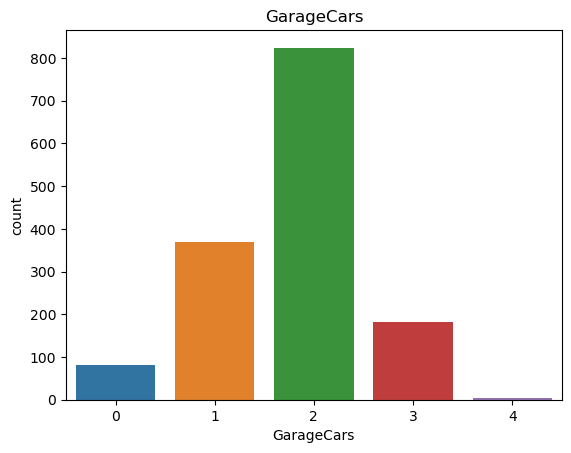

---------------------------------------------------------------------------


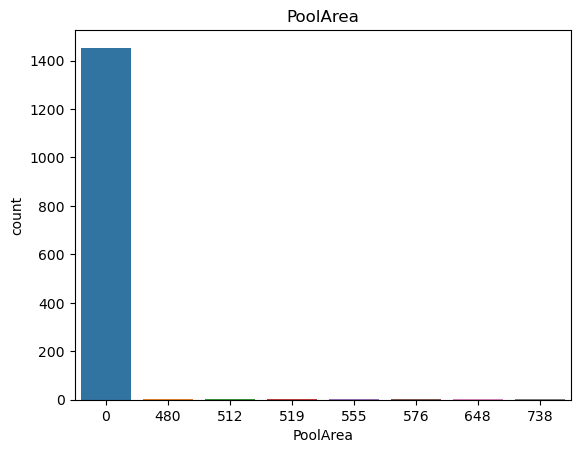

---------------------------------------------------------------------------


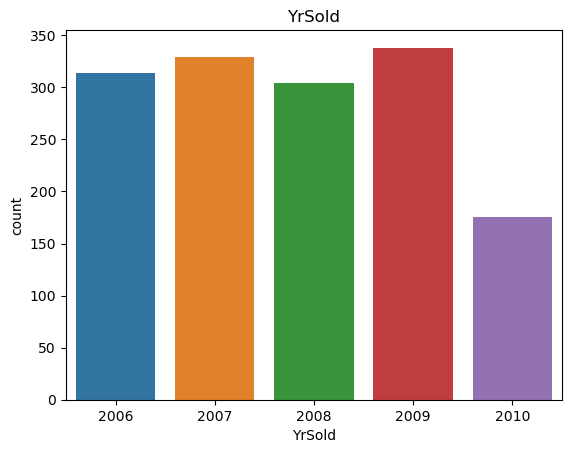

---------------------------------------------------------------------------
-------------------------------------------------------------------------------


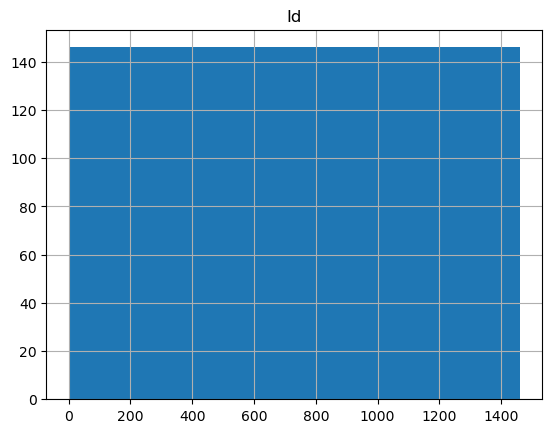

-------------------------------------------------------------------------------


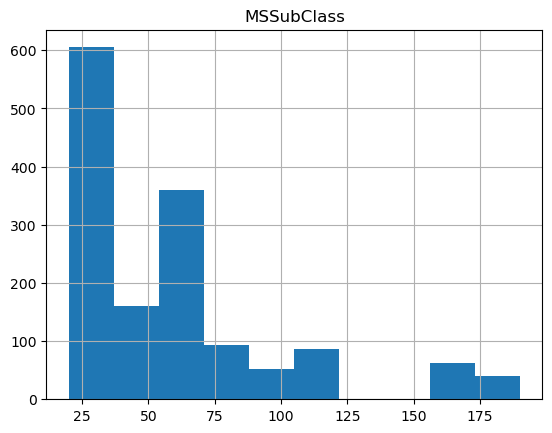

-------------------------------------------------------------------------------


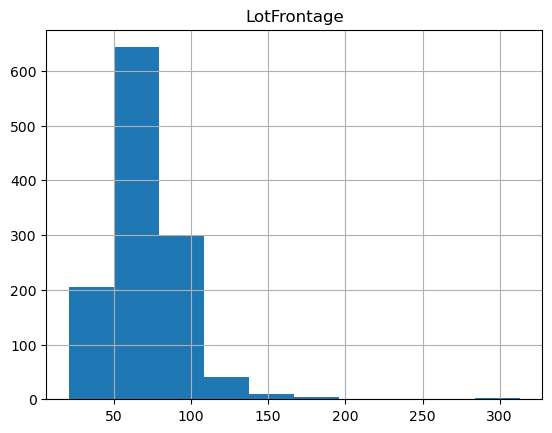

-------------------------------------------------------------------------------


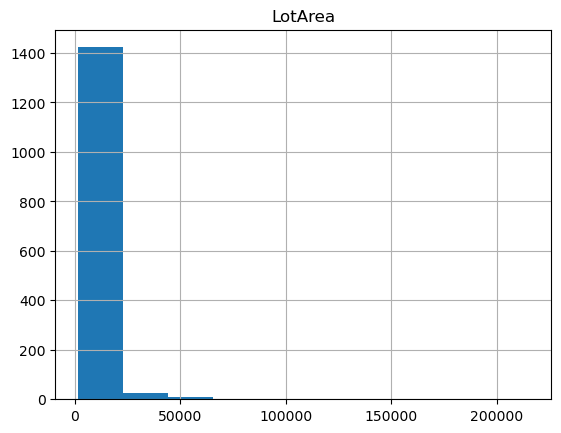

-------------------------------------------------------------------------------


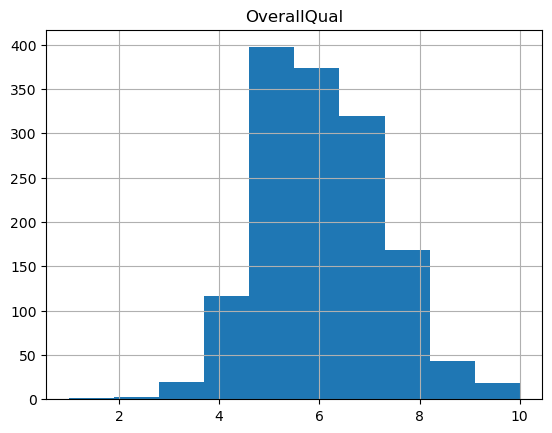

-------------------------------------------------------------------------------


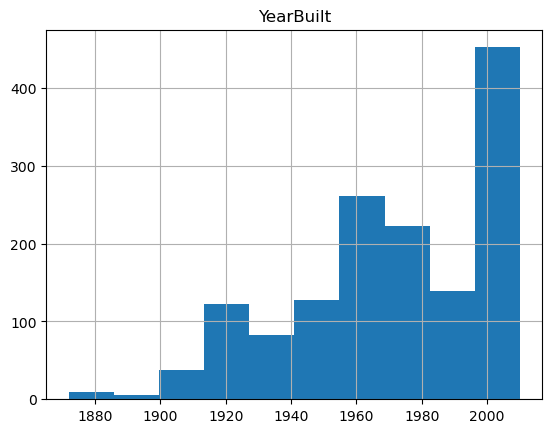

-------------------------------------------------------------------------------


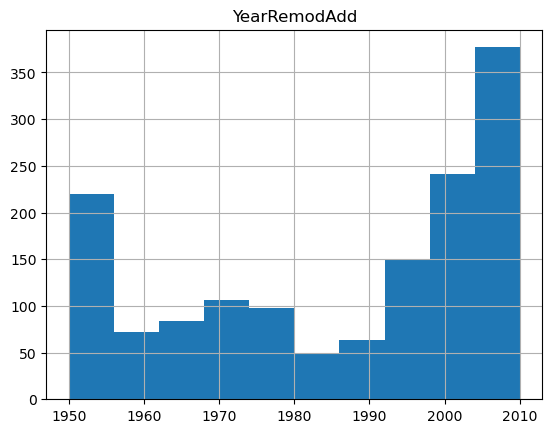

-------------------------------------------------------------------------------


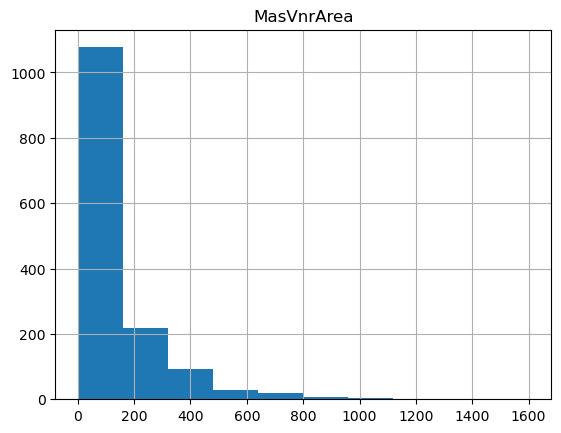

-------------------------------------------------------------------------------


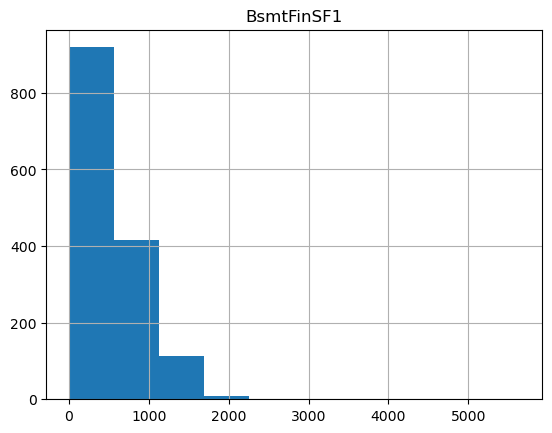

-------------------------------------------------------------------------------


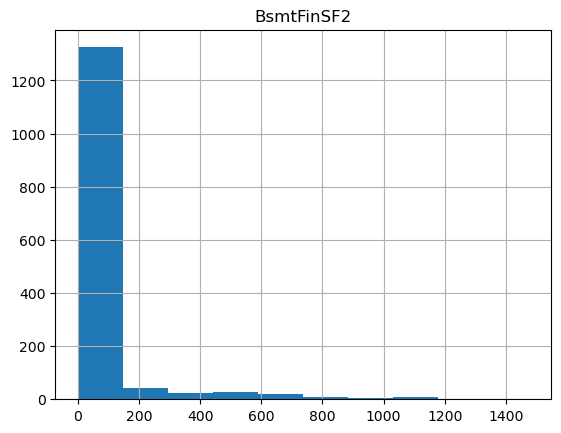

-------------------------------------------------------------------------------


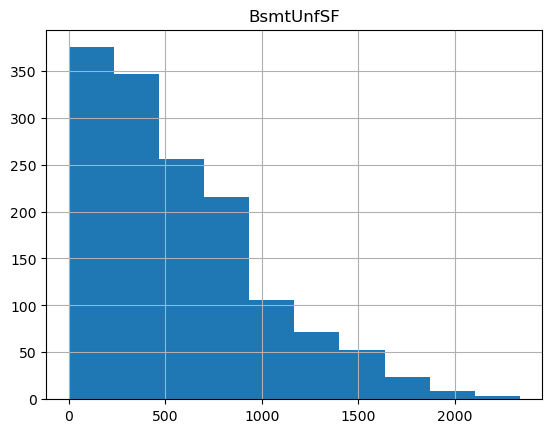

-------------------------------------------------------------------------------


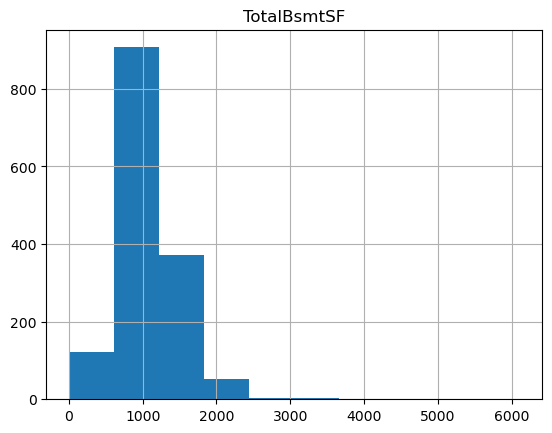

-------------------------------------------------------------------------------


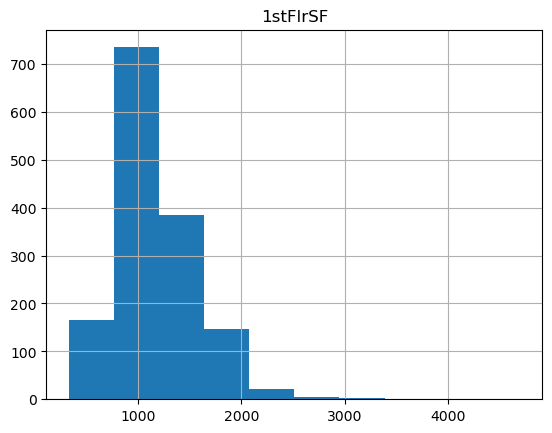

-------------------------------------------------------------------------------


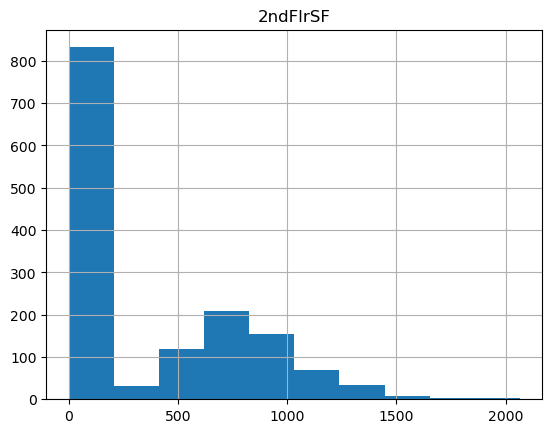

-------------------------------------------------------------------------------


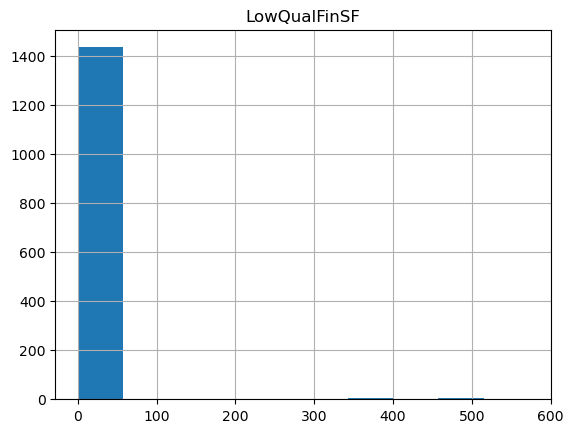

-------------------------------------------------------------------------------


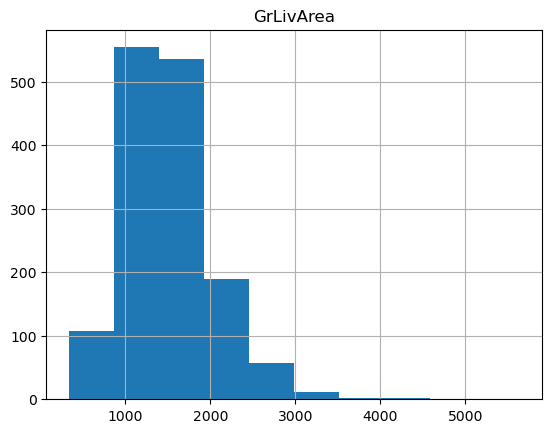

-------------------------------------------------------------------------------


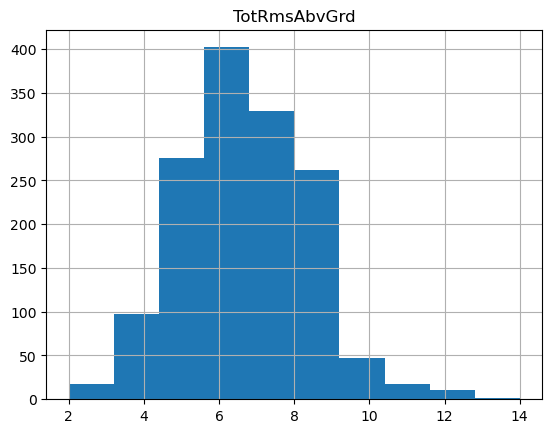

-------------------------------------------------------------------------------


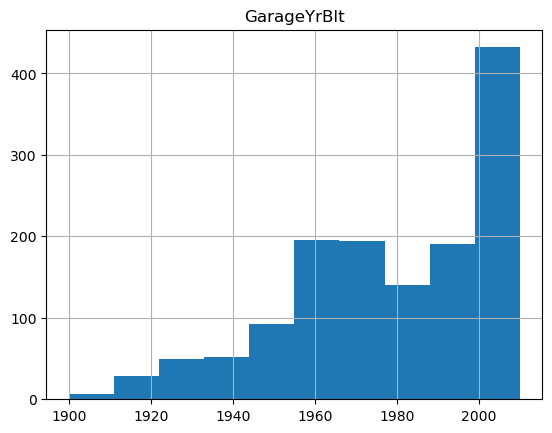

-------------------------------------------------------------------------------


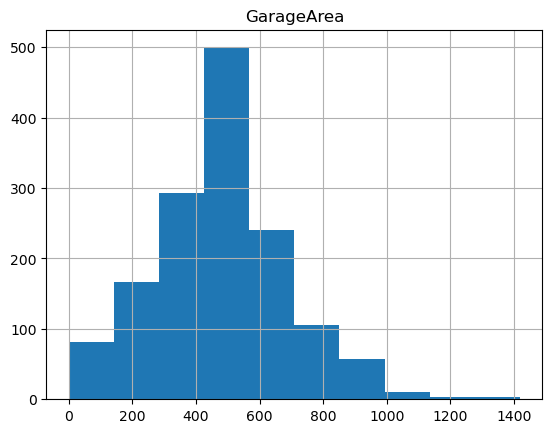

-------------------------------------------------------------------------------


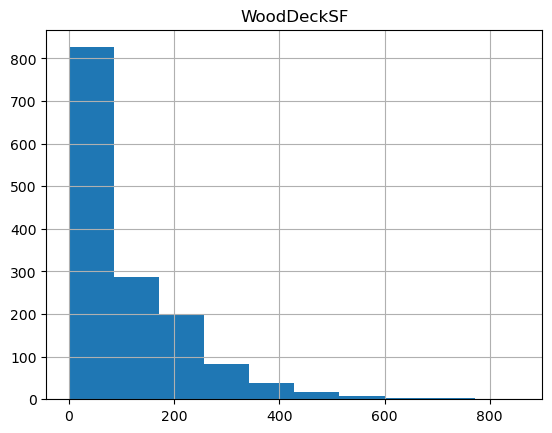

-------------------------------------------------------------------------------


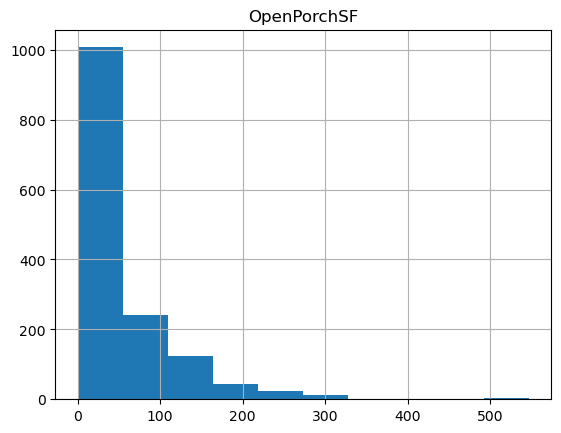

-------------------------------------------------------------------------------


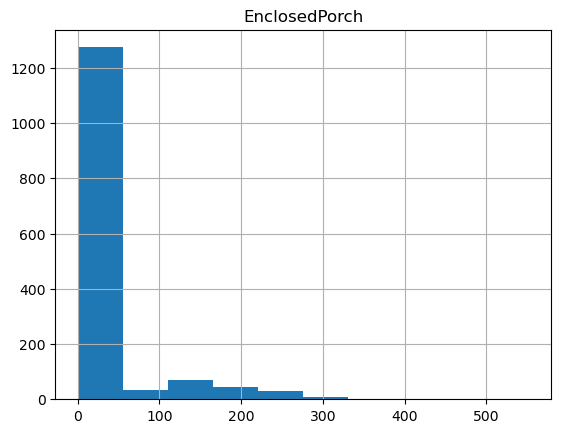

-------------------------------------------------------------------------------


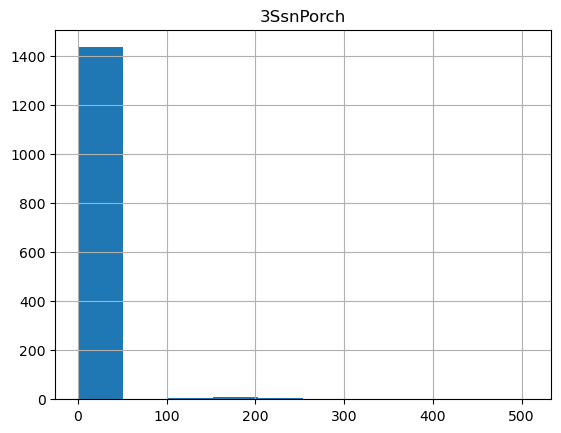

-------------------------------------------------------------------------------


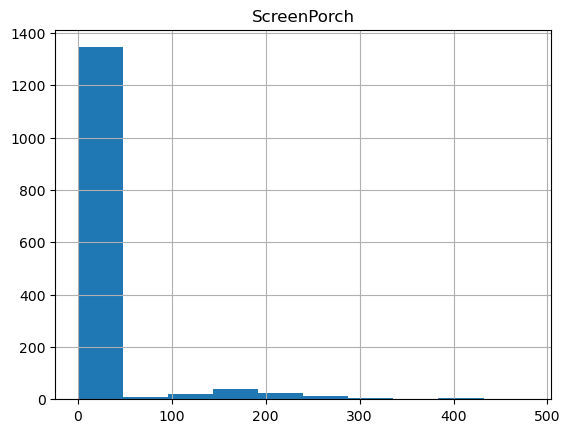

-------------------------------------------------------------------------------


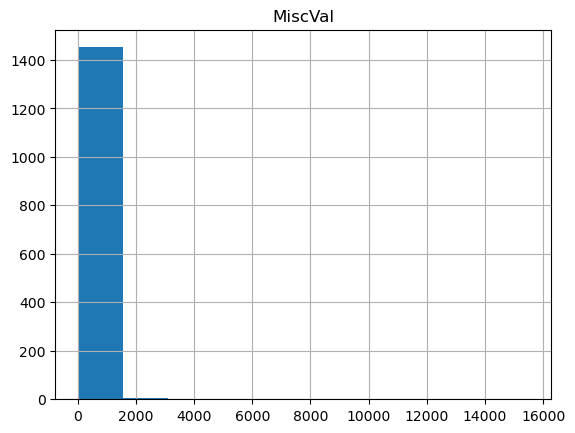

-------------------------------------------------------------------------------


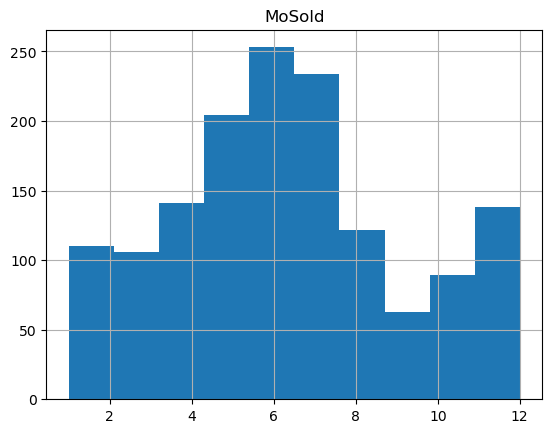

-------------------------------------------------------------------------------


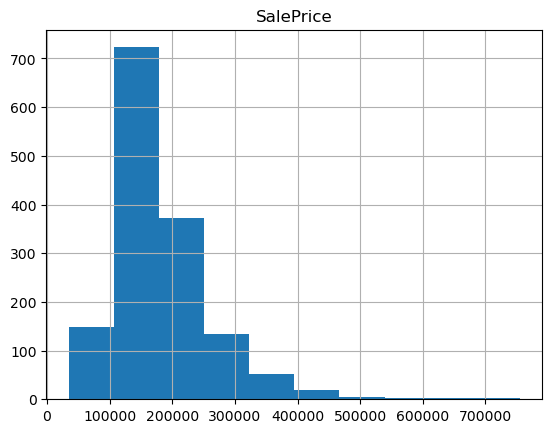

In [12]:
plot_data(df,num_cols,cat_cols)

<AxesSubplot:>

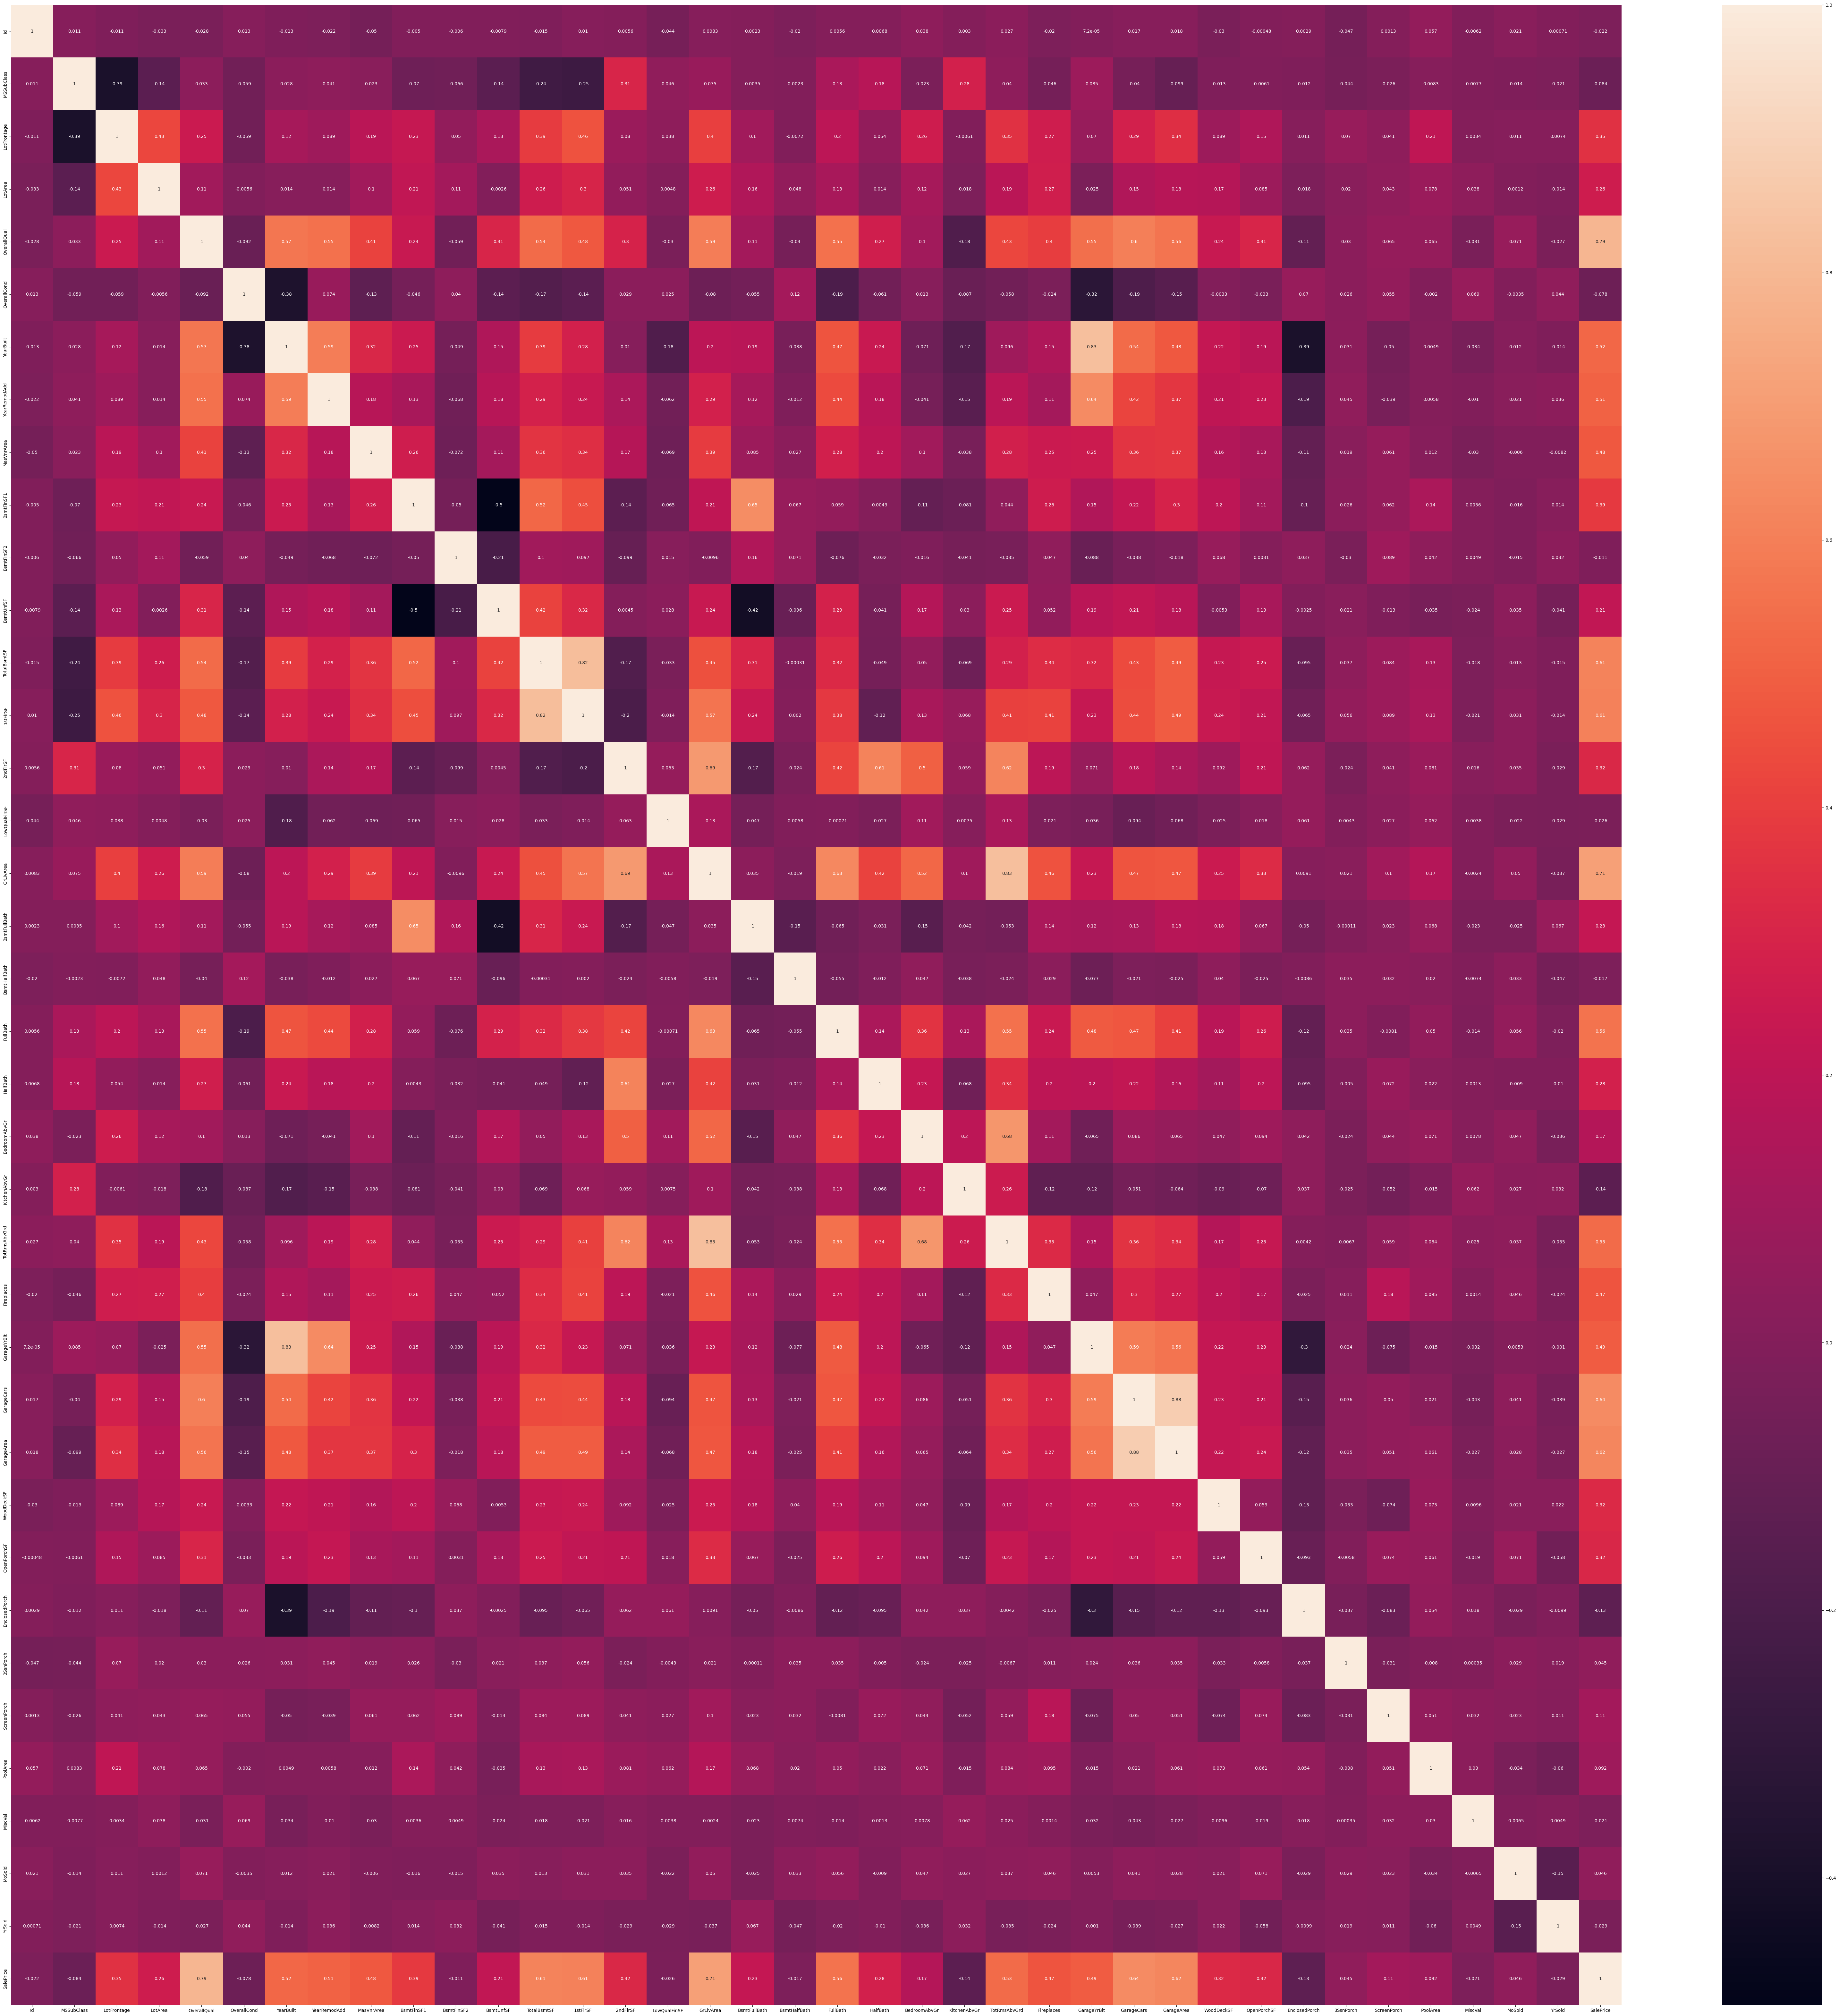

In [13]:
corr = df.corr()  
fig, ax = plt.subplots(figsize=(81,81)) 
sns.heatmap(corr,annot=True)

In [14]:
def Drop_High_Corr(df,corr_level=0.80) : 
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than cor level
    to_drop = [column for column in upper.columns if any(upper[column] > corr_level)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)

In [15]:
Drop_High_Corr(df,corr_level=0.80)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [16]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence'

In [17]:
df.drop("Id",axis=1,inplace=True)

In [18]:
cat_cols,num_cols,cardinal_cols = grab_col_names(df)

In [19]:
df.columns.nunique()

76

In [20]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [21]:
df.columns.nunique()

76

In [22]:
df["MasVnrType"].fillna("none",inplace=True)

In [23]:
df["MasVnrArea"].fillna(df["MasVnrArea"].median(),inplace=True)

In [24]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(),inplace=True)

In [25]:
df.drop('Alley', axis = 1, inplace = True)

In [26]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBa

In [27]:
df["BsmtQual"].fillna("TA",inplace=True)
df["BsmtCond"].fillna("TA",inplace=True)
df["BsmtExposure"].fillna("no",inplace=True)

In [28]:
df["BsmtFinType1"].fillna("Unf",inplace=True)
df["BsmtFinType2"].fillna("Unf",inplace=True)

In [29]:
df["Electrical"].fillna("SBrkr",inplace=True)

In [30]:
df["FireplaceQu"].fillna("Gd",inplace=True) 

In [31]:
df["GarageType"].fillna("Attchd",inplace=True)
df["GarageFinish"].fillna("Unf",inplace=True)

In [32]:
df["GarageQual"].fillna("TA",inplace=True)
df["GarageCond"].fillna("TA",inplace=True)

In [33]:
df.drop(['PoolQC'], axis = 1, inplace = True)

In [34]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBa

In [35]:
df.drop(['Fence'], axis = 1, inplace = True)

In [36]:
df.drop(['MiscFeature'], axis = 1, inplace = True)

In [37]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces  

In [38]:
from sklearn.preprocessing import StandardScaler 

In [39]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073,RL,-0.229,-0.207,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651,5,1.051,0.879,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514,Gd,TA,PConc,Gd,TA,No,GLQ,0.575,Unf,-0.289,-0.945,-0.459,GasA,Ex,Y,SBrkr,1.162,-0.120,0.370,1,0,2,1,3,1,Gd,Typ,0,Gd,Attchd,RFn,2,TA,TA,Y,-0.752,0.217,-0.359,-0.116,-0.270,0,-0.088,-1.599,2008,WD,Normal,0.347
1,-0.873,RL,0.452,-0.092,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.072,8,0.157,-0.430,Gable,CompShg,MetalSd,MetalSd,None,-0.571,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.172,Unf,-0.289,-0.641,0.466,GasA,Ex,Y,SBrkr,-0.795,-0.120,-0.483,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,1.626,-0.704,-0.359,-0.116,-0.270,0,-0.088,-0.489,2007,WD,Normal,0.007
2,0.073,RL,-0.093,0.073,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651,5,0.985,0.830,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.326,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.093,Unf,-0.289,-0.302,-0.313,GasA,Ex,Y,SBrkr,1.189,-0.120,0.515,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,-0.752,-0.070,-0.359,-0.116,-0.270,0,-0.088,0.991,2008,WD,Normal,0.536
3,0.310,RL,-0.456,-0.097,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651,5,-1.864,-0.720,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.571,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.499,Unf,-0.289,-0.062,-0.687,GasA,Gd,Y,SBrkr,0.937,-0.120,0.384,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,-0.752,-0.176,4.093,-0.116,-0.270,0,-0.088,-1.599,2006,WD,Abnorml,-0.515
4,0.073,RL,0.634,0.375,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.375,5,0.952,0.733,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366,Gd,TA,PConc,Gd,TA,Av,GLQ,0.464,Unf,-0.289,-0.175,0.200,GasA,Ex,Y,SBrkr,1.618,-0.120,1.299,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,0.780,0.564,-0.359,-0.116,-0.270,0,-0.088,2.101,2008,WD,Normal,0.870


In [40]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073,RL,-0.229,-0.207,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651,5,1.051,0.879,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514,Gd,TA,PConc,Gd,TA,No,GLQ,0.575,Unf,-0.289,-0.945,-0.459,GasA,Ex,Y,SBrkr,1.162,-0.120,0.370,1,0,2,1,3,1,Gd,Typ,0,Gd,Attchd,RFn,2,TA,TA,Y,-0.752,0.217,-0.359,-0.116,-0.270,0,-0.088,-1.599,2008,WD,Normal,0.347
1,-0.873,RL,0.452,-0.092,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,-0.072,8,0.157,-0.430,Gable,CompShg,MetalSd,MetalSd,None,-0.571,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.172,Unf,-0.289,-0.641,0.466,GasA,Ex,Y,SBrkr,-0.795,-0.120,-0.483,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,1.626,-0.704,-0.359,-0.116,-0.270,0,-0.088,-0.489,2007,WD,Normal,0.007
2,0.073,RL,-0.093,0.073,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,0.651,5,0.985,0.830,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.326,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.093,Unf,-0.289,-0.302,-0.313,GasA,Ex,Y,SBrkr,1.189,-0.120,0.515,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,-0.752,-0.070,-0.359,-0.116,-0.270,0,-0.088,0.991,2008,WD,Normal,0.536
3,0.310,RL,-0.456,-0.097,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,0.651,5,-1.864,-0.720,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.571,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.499,Unf,-0.289,-0.062,-0.687,GasA,Gd,Y,SBrkr,0.937,-0.120,0.384,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,-0.752,-0.176,4.093,-0.116,-0.270,0,-0.088,-1.599,2006,WD,Abnorml,-0.515
4,0.073,RL,0.634,0.375,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,1.375,5,0.952,0.733,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366,Gd,TA,PConc,Gd,TA,Av,GLQ,0.464,Unf,-0.289,-0.175,0.200,GasA,Ex,Y,SBrkr,1.618,-0.120,1.299,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,0.780,0.564,-0.359,-0.116,-0.270,0,-0.088,2.101,2008,WD,Normal,0.870


In [41]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [42]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [43]:
for col in num_cols:
    print(check_outlier(df,col))

False
True
True
False
False
False
True
True
True
False
True
False
True
True
True
True
True
True
True
True
False
True


In [44]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [45]:
for col in num_cols: 
    replace_with_thresholds(df,col,0.05,0.95)

In [46]:
for col in num_cols:
    print(check_outlier(df,col))

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [47]:
df = pd.get_dummies(df,drop_first=True) 
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_no,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073,-0.229,-0.207,0.651,5,1.051,0.879,0.514,0.575,-0.289,-0.945,-0.459,1.162,-0.120,0.370,1,0,2,1,3,1,0,2,-0.752,0.217,-0.359,-0.116,-0.270,0,-0.088,-1.599,2008,0.347,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1

In [48]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the features (X) and target variable (Y)
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

# Perform univariate feature selection
selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, Y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'ExterQual_TA'], dtype='object')


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:284: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) - n_samples * X_means ** 2)


In [49]:
from sklearn.model_selection import train_test_split


In [50]:
from sklearn.ensemble import RandomForestRegressor

X = df[['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'ExterQual_TA']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [51]:
X_train.shape

(949, 5)

In [52]:
y_train.shape

(949,)

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.1801555592315278
Mean Absolute Error: 0.29216754461077116
R-squared: 0.822252875186193
